In [3]:
import numpy as np
import pandas as pd
import queue
import matplotlib.pyplot as plt

import sys
backtest_dir = 'C://backtest/backtest/'
if backtest_dir not in sys.path:
    sys.path.insert(0, backtest_dir)
    
from Backtest import *
from BayesianOptimization import *
from MACD_BOLLStrategy import MACD_BOLLStrategy
from Backtest.open_json_gz_files import open_json_gz_files
from Backtest.generate_bars import generate_bars

In [4]:
def run_backtest(config, trading_data, ohlc_data, short_window, delta_window, window, a):
    short_window = int(short_window)
    long_window = short_window + int(delta_window)
    window = int(window)
    config['title'] = "MACD_BOLLStrategy" + "_" +  str(short_window) + "_" + str(long_window) + "_" + str(window) + "_" + str(a)
    print("---------------------------------")
    print(config['title'])
    print("---------------------------------")
    
    events_queue = queue.Queue()

    data_handler = OHLCDataHandler(
        config, events_queue,
        trading_data = trading_data, ohlc_data = ohlc_data
    )
    strategy = MACD_BOLLStrategy(config, events_queue, data_handler,
                            short_window=short_window, long_window=long_window,
                            window = window, a = a)

    backtest = Backtest(config, events_queue, strategy,
                        data_handler= data_handler)

    results = backtest.start_trading()
    
    return (results['cum_returns'][-1] - 1)

## Setting

In [5]:
config = {
    "csv_dir": "C:/backtest/Binance",
    "out_dir": "C:/backtest/results/MACD_BOLLStrategy",
    "title": "MACD_BOLLStrategy",
    "is_plot": False,
    "save_plot": False,
    "save_tradelog": False,
    "start_date": pd.Timestamp("2017-07-01T00:0:00", freq = "60" + "T"),    # str(freq) + "T"
    "end_date": pd.Timestamp("2018-04-01T00:00:00", freq = "60" + "T"),
    "equity": 1.0,
    "freq": 60,      # min
    "commission_ratio": 0.001,
    "suggested_quantity": None,     # None or a value
    "max_quantity": None,           # None or a value, Maximum purchase quantity
    "min_quantity": None,           # None or a value, Minimum purchase quantity
    "min_handheld_cash": None,      # None or a value, Minimum handheld funds
    "exchange": "Binance",
    "tickers": ['BTCUSDT']
}

In [6]:
# trading_data = {}
# for ticker in config['tickers']:
#     # trading_data[ticker] = open_gz_files(config['csv_dir'], ticker)
#     trading_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '.h5', key=ticker)

ohlc_data = {}
for ticker in config['tickers']:
    # ohlc_data[ticker] = generate_bars(trading_data, ticker, config['freq'])
    ohlc_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker +'_OHLC_60min.h5', key=ticker)

trading_data = None

In [7]:
gp_params = {"alpha": 1e-5}

## Acquisition Function "Upper Confidence Bound"

* Prefer exploitation (kappa=1.0)

* Prefer exploration (kappa=10)


## Acquisition Function "Expected Improvement"

* Prefer exploitation (xi=1e-4)
* Prefer exploration (xi=0.1)

In [8]:
BO = BayesianOptimization(
    run_backtest,
    {'short_window': (1, 120),
    'delta_window': (1, 120),
    'window': (1, 240),
    'a': (0.1, 3)},
    is_int = [1, 1, 1, 0], 
    invariant = {
        'config': config,
        'trading_data': trading_data,
        'ohlc_data': ohlc_data
    },
    random_state = 1
)
# BO.explore({
#     'short_window': np.arange(1, 120, 20),
#     'delta_window': np.arange(1, 120, 20)
#     },
#     eager=True)
BO.maximize(init_points=50, n_iter=100, acq="ei", xi=0.01, **gp_params)

Initialization
---------------------------------------------------------------------------------------
 Step |   Time |      Value |         a |   delta_window |   short_window |    window | 
---------------------------------
MACD_BOLLStrategy2_38_154_24_2.277733058679278
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.5568854239
Sortino Ratio: 4.3206405172
Max Drawdown: 0.2394581852
Max Drawdown Duration: 273500
Total Returns: 0.9227140778
Annualized Returns: 2.1716752610
Compound Annual Growth Rate: 3.6581566070
---------------------------------
Trades: 18
Trade Winning: 38.89%
Average Trade: 5.01%
Average Win: 16.78%
Average Loss: -2.47%
Best Trade: 73.41%
Worst Trade: -5.84%
Worst Trade Date: 0 days 19:00:00
Avg

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.3281988440
Sortino Ratio: 1.4469475401
Max Drawdown: 0.2102207716
Max Drawdown Duration: 199500
Total Returns: 0.4583176395
Annualized Returns: 1.0786841810
Compound Annual Growth Rate: 1.4301775451
---------------------------------
Trades: 4
Trade Winning: 75.00%
Average Trade: 10.57%
Average Win: 15.44%
Average Loss: -4.03%
Best Trade: 23.13%
Worst Trade: -4.03%
Worst Trade Date: 2 days 08:00:00
Avg Days in Trade: 5 days 09:45:00
---------------------------------
   10 | 00m12s |    0.45832 | 2.853519 | 50.000000 | 17.000000 | 161.000000 | 
---------------------------------
MACD_BOLLStrategy2_2_60_217_1.4047451870918275
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest comp

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.3694320817
Sortino Ratio: 2.9958587993
Max Drawdown: 0.3774833697
Max Drawdown Duration: 250900
Total Returns: 0.9480276635
Annualized Returns: 2.2312526417
Compound Annual Growth Rate: 3.8037827227
---------------------------------
Trades: 7
Trade Winning: 42.86%
Average Trade: 16.22%
Average Win: 48.18%
Average Loss: -7.74%
Best Trade: 122.88%
Worst Trade: -13.04%
Worst Trade Date: 2 days 07:00:00
Avg Days in Trade: 10 days 02:08:34
---------------------------------
   19 | 00m15s |    0.94803 | 1.047270 | 53.000000 | 102.000000 | 206.000000 | 
---------------------------------
MACD_BOLLStrategy2_19_100_7_1.628468496547067
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest c

---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3795075987
Sortino Ratio: 1.3786919481
Max Drawdown: 0.2638492433
Max Drawdown Duration: 273500
Total Returns: 0.2521532401
Annualized Returns: 0.5934611454
Compound Annual Growth Rate: 0.6976339270
---------------------------------
Trades: 3
Trade Winning: 66.67%
Average Trade: 8.56%
Average Win: 13.89%
Average Loss: -2.09%
Best Trade: 24.16%
Worst Trade: -2.09%
Worst Trade Date: 7 days 04:00:00
Avg Days in Trade: 5 days 18:00:00
---------------------------------
   28 | 00m12s |    0.25215 | 2.992236 | 26.000000 | 69.000000 | 204.000000 | 
---------------------------------
MACD_BOLLStrategy2_88_200_8_0.5997874742014527
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backte

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.0196935514
Sortino Ratio: 1.1057168855
Max Drawdown: 0.2756519620
Max Drawdown Duration: 273500
Total Returns: 0.2036525693
Annualized Returns: 0.4793112592
Compound Annual Growth Rate: 0.5469110955
---------------------------------
Trades: 17
Trade Winning: 70.59%
Average Trade: 1.44%
Average Win: 4.09%
Average Loss: -4.91%
Best Trade: 14.88%
Worst Trade: -10.25%
Worst Trade Date: 1 days 03:00:00
Avg Days in Trade: 2 days 12:42:21
---------------------------------
   37 | 00m07s |    0.20365 | 2.163422 | 10.000000 | 106.000000 | 37.000000 | 
---------------------------------
MACD_BOLLStrategy2_10_78_104_0.46038578971927757
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest co

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.8274369235
Sortino Ratio: 1.2392674069
Max Drawdown: 0.3946473959
Max Drawdown Duration: 273500
Total Returns: 0.1554936037
Annualized Returns: 0.3659656015
Compound Annual Growth Rate: 0.4051672617
---------------------------------
Trades: 17
Trade Winning: 47.06%
Average Trade: 1.39%
Average Win: 7.83%
Average Loss: -4.33%
Best Trade: 24.97%
Worst Trade: -12.54%
Worst Trade Date: 2 days 10:00:00
Avg Days in Trade: 2 days 13:10:35
---------------------------------
   46 | 00m05s |    0.15549 | 2.541890 | 39.000000 | 61.000000 | 11.000000 | 
---------------------------------
MACD_BOLLStrategy2_82_91_24_0.4601026138477423
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest compl

---------------------------------
MACD_BOLLStrategy2_4_48_189_0.1
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.1186987484
Sortino Ratio: 3.6170091157
Max Drawdown: 0.3184370222
Max Drawdown Duration: 250900
Total Returns: 0.7646881756
Annualized Returns: 1.7997497094
Compound Annual Growth Rate: 2.8067220989
---------------------------------
Trades: 46
Trade Winning: 36.96%
Average Trade: 1.71%
Average Win: 8.84%
Average Loss: -2.47%
Best Trade: 32.91%
Worst Trade: -7.42%
Worst Trade Date: 1 days 03:00:00
Avg Days in Trade: 1 days 07:57:23
---------------------------------
   55 | 00m28s |    0.76469 | 0.100000 | 44.000000 | 4.000000 | 189.000000 | 
---------------------------------
MACD_BOLLStrategy2_79_127_167_

---------------------------------
MACD_BOLLStrategy2_86_115_140_2.8469574332456804
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.6551952783
Sortino Ratio: 1.9260064196
Max Drawdown: 0.3188090341
Max Drawdown Duration: 250900
Total Returns: 0.4439771197
Annualized Returns: 1.0449327158
Compound Annual Growth Rate: 1.3743071320
---------------------------------
Trades: 4
Trade Winning: 50.00%
Average Trade: 17.81%
Average Win: 51.58%
Average Loss: -15.95%
Best Trade: 100.25%
Worst Trade: -16.20%
Worst Trade Date: 2 days 11:00:00
Avg Days in Trade: 7 days 16:45:00
---------------------------------
   64 | 00m31s |    0.44398 | 2.846957 | 29.000000 | 86.000000 | 140.000000 | 
---------------------------------
MACD_BOL

---------------------------------
MACD_BOLLStrategy2_68_164_56_2.561780760819941
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.5656205234
Sortino Ratio: 1.6123864510
Max Drawdown: 0.4577800113
Max Drawdown Duration: 273500
Total Returns: 0.4685659478
Annualized Returns: 1.1028043264
Compound Annual Growth Rate: 1.4705632951
---------------------------------
Trades: 8
Trade Winning: 50.00%
Average Trade: 6.97%
Average Win: 20.47%
Average Loss: -6.52%
Best Trade: 59.66%
Worst Trade: -15.48%
Worst Trade Date: 2 days 09:00:00
Avg Days in Trade: 6 days 12:00:00
---------------------------------
   73 | 00m28s |    0.46857 | 2.561781 | 96.000000 | 68.000000 | 56.000000 | 
---------------------------------
MACD_BOLLStrat

---------------------------------
MACD_BOLLStrategy2_16_122_225_2.6208054003720562
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.3935602486
Sortino Ratio: 0.3563933520
Max Drawdown: 0.3982601200
Max Drawdown Duration: 273500
Total Returns: 0.0321809401
Annualized Returns: 0.0757402030
Compound Annual Growth Rate: 0.0773960210
---------------------------------
Trades: 6
Trade Winning: 50.00%
Average Trade: 1.16%
Average Win: 9.31%
Average Loss: -7.00%
Best Trade: 17.00%
Worst Trade: -10.69%
Worst Trade Date: 2 days 20:00:00
Avg Days in Trade: 4 days 16:00:00
---------------------------------
   82 | 00m35s |    0.03218 | 2.620805 | 106.000000 | 16.000000 | 225.000000 | 
---------------------------------
MACD_BOLLSt

---------------------------------
MACD_BOLLStrategy2_64_147_179_1.4873258192147045
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.8993629942
Sortino Ratio: 4.3560690440
Max Drawdown: 0.3005094969
Max Drawdown Duration: 250900
Total Returns: 1.2168069149
Annualized Returns: 2.8638443241
Compound Annual Growth Rate: 5.5117226470
---------------------------------
Trades: 7
Trade Winning: 42.86%
Average Trade: 18.59%
Average Win: 51.67%
Average Loss: -6.23%
Best Trade: 129.19%
Worst Trade: -13.49%
Worst Trade Date: 2 days 08:00:00
Avg Days in Trade: 9 days 18:17:09
---------------------------------
   91 | 00m33s |    1.21681 | 1.487326 | 83.000000 | 64.000000 | 179.000000 | 
---------------------------------
MACD_BOLL

---------------------------------
MACD_BOLLStrategy2_88_132_210_3.0
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.7330194790
Sortino Ratio: 3.2164533876
Max Drawdown: 0.2638492433
Max Drawdown Duration: 161900
Total Returns: 0.8184547347
Annualized Returns: 1.9262932499
Compound Annual Growth Rate: 3.0853462487
---------------------------------
Trades: 2
Trade Winning: 50.00%
Average Trade: 41.80%
Average Win: 84.80%
Average Loss: -1.21%
Best Trade: 84.80%
Worst Trade: -1.21%
Worst Trade Date: 7 days 10:00:00
Avg Days in Trade: 11 days 23:30:00
---------------------------------
  100 | 00m34s |    0.81845 | 3.000000 | 44.000000 | 88.000000 | 210.000000 | 
---------------------------------
MACD_BOLLStrategy2_55_126

---------------------------------
MACD_BOLLStrategy2_68_132_202_0.1
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.5435854486
Sortino Ratio: 1.6645108331
Max Drawdown: 0.5977808159
Max Drawdown Duration: 250900
Total Returns: 0.5247192159
Annualized Returns: 1.2349651615
Compound Annual Growth Rate: 1.6986763575
---------------------------------
Trades: 23
Trade Winning: 26.09%
Average Trade: 3.67%
Average Win: 26.78%
Average Loss: -4.49%
Best Trade: 98.28%
Worst Trade: -8.39%
Worst Trade Date: 0 days 15:00:00
Avg Days in Trade: 3 days 06:57:23
---------------------------------
  109 | 00m34s |    0.52472 | 0.100000 | 64.000000 | 68.000000 | 202.000000 | 
---------------------------------
MACD_BOLLStrategy2_60_133_

---------------------------------
MACD_BOLLStrategy2_50_164_25_2.5022980499488914
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.2319530638
Sortino Ratio: 2.5410300024
Max Drawdown: 0.3191989092
Max Drawdown Duration: 273500
Total Returns: 0.7623395876
Annualized Returns: 1.7942221352
Compound Annual Growth Rate: 2.7948089523
---------------------------------
Trades: 15
Trade Winning: 46.67%
Average Trade: 5.05%
Average Win: 14.34%
Average Loss: -3.07%
Best Trade: 59.66%
Worst Trade: -7.33%
Worst Trade Date: 1 days 01:00:00
Avg Days in Trade: 3 days 02:52:00
---------------------------------
  118 | 00m37s |    0.76234 | 2.502298 | 114.000000 | 50.000000 | 25.000000 | 
---------------------------------
MACD_BOLLStr

---------------------------------
MACD_BOLLStrategy2_51_129_41_0.5232929729484215
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.3953005750
Sortino Ratio: 3.5671757529
Max Drawdown: 0.2729818248
Max Drawdown Duration: 250900
Total Returns: 0.9204302562
Annualized Returns: 2.1663001195
Compound Annual Growth Rate: 3.6451447265
---------------------------------
Trades: 33
Trade Winning: 51.52%
Average Trade: 2.50%
Average Win: 8.10%
Average Loss: -3.44%
Best Trade: 30.46%
Worst Trade: -9.73%
Worst Trade Date: 0 days 09:00:00
Avg Days in Trade: 1 days 15:32:44
---------------------------------
  127 | 00m31s |    0.92043 | 0.523293 | 78.000000 | 51.000000 | 41.000000 | 
---------------------------------
MACD_BOLLStrat

---------------------------------
MACD_BOLLStrategy2_42_155_32_0.8572005464921055
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 3.5540639962
Sortino Ratio: 6.6484876688
Max Drawdown: 0.1744528390
Max Drawdown Duration: 122000
Total Returns: 1.6203475705
Annualized Returns: 3.8136068559
Compound Annual Growth Rate: 8.6524677589
---------------------------------
Trades: 28
Trade Winning: 57.14%
Average Trade: 4.01%
Average Win: 8.82%
Average Loss: -2.40%
Best Trade: 28.68%
Worst Trade: -7.28%
Worst Trade Date: 0 days 08:00:00
Avg Days in Trade: 1 days 21:00:00
---------------------------------
  136 | 00m25s |    1.62035 | 0.857201 | 113.000000 | 42.000000 | 32.000000 | 
---------------------------------
MACD_BOLLStra

---------------------------------
MACD_BOLLStrategy2_89_184_26_2.2661771368327757
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.9350596246
Sortino Ratio: 4.1640611113
Max Drawdown: 0.2017770682
Max Drawdown Duration: 170500
Total Returns: 1.0406201592
Annualized Returns: 2.4491758717
Compound Annual Growth Rate: 4.3585587159
---------------------------------
Trades: 15
Trade Winning: 46.67%
Average Trade: 6.32%
Average Win: 16.56%
Average Loss: -2.64%
Best Trade: 72.08%
Worst Trade: -4.40%
Worst Trade Date: 0 days 07:00:00
Avg Days in Trade: 2 days 21:40:00
---------------------------------
  145 | 00m25s |    1.04062 | 2.266177 | 95.000000 | 89.000000 | 26.000000 | 
---------------------------------
MACD_BOLLStra

In [9]:
print(BO.res['max'])

{'max_val': 2.0538804896742766, 'max_params': {'short_window': 13.0, 'delta_window': 20.0, 'window': 153.0, 'a': 0.1}}


In [10]:
BO.maximize(init_points=0, n_iter=110, acq="ei", xi=0.0001, **gp_params)

Bayesian Optimization
---------------------------------------------------------------------------------------
 Step |   Time |      Value |         a |   delta_window |   short_window |    window | 
---------------------------------
MACD_BOLLStrategy2_12_51_120_0.5207968416993504
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 3.4417945131
Sortino Ratio: 5.8964665091
Max Drawdown: 0.2460769210
Max Drawdown Duration: 132200
Total Returns: 1.6798811255
Annualized Returns: 3.9537234443
Compound Annual Growth Rate: 9.1765671131
---------------------------------
Trades: 33
Trade Winning: 54.55%
Average Trade: 3.63%
Average Win: 9.62%
Average Loss: -3.56%
Best Trade: 26.45%
Worst Trade: -8.79%
Worst Trade Date: 0 days 10:00

---------------------------------
MACD_BOLLStrategy2_5_93_113_1.5796412945079858
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.1439904632
Sortino Ratio: 2.2242635944
Max Drawdown: 0.5219553107
Max Drawdown Duration: 273500
Total Returns: 0.8126925774
Annualized Returns: 1.9127315901
Compound Annual Growth Rate: 3.0549438949
---------------------------------
Trades: 14
Trade Winning: 50.00%
Average Trade: 5.41%
Average Win: 17.73%
Average Loss: -6.91%
Best Trade: 24.98%
Worst Trade: -13.26%
Worst Trade Date: 1 days 00:00:00
Avg Days in Trade: 4 days 18:25:43
---------------------------------
  160 | 00m22s |    0.81269 | 1.579641 | 88.000000 | 5.000000 | 113.000000 | 
---------------------------------
MACD_BOLLStra

---------------------------------
MACD_BOLLStrategy2_69_146_179_1.7761893363214112
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.6172011970
Sortino Ratio: 3.7225069635
Max Drawdown: 0.3636476061
Max Drawdown Duration: 250900
Total Returns: 1.0189578720
Annualized Returns: 2.3981920899
Compound Annual Growth Rate: 4.2256387029
---------------------------------
Trades: 7
Trade Winning: 42.86%
Average Trade: 16.59%
Average Win: 47.76%
Average Loss: -6.78%
Best Trade: 120.41%
Worst Trade: -15.48%
Worst Trade Date: 2 days 09:00:00
Avg Days in Trade: 9 days 13:34:17
---------------------------------
  169 | 00m32s |    1.01896 | 1.776189 | 77.000000 | 69.000000 | 179.000000 | 
---------------------------------
MACD_BOLL

---------------------------------
MACD_BOLLStrategy2_59_77_41_0.16489191472806436
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.3875971777
Sortino Ratio: 3.9905903370
Max Drawdown: 0.2343439596
Max Drawdown Duration: 172500
Total Returns: 0.9158553530
Annualized Returns: 2.1555327491
Compound Annual Growth Rate: 3.6191425443
---------------------------------
Trades: 53
Trade Winning: 32.08%
Average Trade: 1.64%
Average Win: 8.91%
Average Loss: -1.79%
Best Trade: 30.44%
Worst Trade: -4.33%
Worst Trade Date: 0 days 19:00:00
Avg Days in Trade: 0 days 23:30:34
---------------------------------
  178 | 00m28s |    0.91586 | 0.164892 | 18.000000 | 59.000000 | 41.000000 | 
---------------------------------
MACD_BOLLStrat

---------------------------------
MACD_BOLLStrategy2_10_38_27_1.378730292052831
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.2938230988
Sortino Ratio: 3.9873825767
Max Drawdown: 0.3873945218
Max Drawdown Duration: 227600
Total Returns: 1.0145670088
Annualized Returns: 2.3878578713
Compound Annual Growth Rate: 4.1989301582
---------------------------------
Trades: 40
Trade Winning: 52.50%
Average Trade: 2.37%
Average Win: 8.65%
Average Loss: -4.56%
Best Trade: 28.08%
Worst Trade: -13.33%
Worst Trade Date: 0 days 04:00:00
Avg Days in Trade: 1 days 18:18:00
---------------------------------
  187 | 00m25s |    1.01457 | 1.378730 | 28.000000 | 10.000000 | 27.000000 | 
---------------------------------
MACD_BOLLStrate

---------------------------------
MACD_BOLLStrategy2_16_129_210_0.9778828657606065
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.7898142354
Sortino Ratio: 4.1479938953
Max Drawdown: 0.2887956147
Max Drawdown Duration: 100700
Total Returns: 1.2243582273
Annualized Returns: 2.8816168917
Compound Annual Growth Rate: 5.5640487839
---------------------------------
Trades: 13
Trade Winning: 61.54%
Average Trade: 7.22%
Average Win: 14.61%
Average Loss: -4.61%
Best Trade: 32.60%
Worst Trade: -8.60%
Worst Trade Date: 1 days 16:00:00
Avg Days in Trade: 5 days 07:13:51
---------------------------------
  196 | 00m41s |    1.22436 | 0.977883 | 113.000000 | 16.000000 | 210.000000 | 
---------------------------------
MACD_BOLLS

---------------------------------
MACD_BOLLStrategy2_28_114_43_1.4541047431365026
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.9778871164
Sortino Ratio: 2.6400443192
Max Drawdown: 0.3676333969
Max Drawdown Duration: 273500
Total Returns: 0.6767317055
Annualized Returns: 1.5927377056
Compound Annual Growth Rate: 2.3751376630
---------------------------------
Trades: 20
Trade Winning: 45.00%
Average Trade: 3.45%
Average Win: 13.63%
Average Loss: -4.88%
Best Trade: 34.19%
Worst Trade: -9.27%
Worst Trade Date: 1 days 01:00:00
Avg Days in Trade: 3 days 02:48:00
---------------------------------
  205 | 00m26s |    0.67673 | 1.454105 | 86.000000 | 28.000000 | 43.000000 | 
---------------------------------
MACD_BOLLStra

---------------------------------
MACD_BOLLStrategy2_83_107_165_1.7884308517150407
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.4356463831
Sortino Ratio: 3.4037322794
Max Drawdown: 0.2809286305
Max Drawdown Duration: 201700
Total Returns: 0.8753829771
Annualized Returns: 2.0602780438
Compound Annual Growth Rate: 3.3927579551
---------------------------------
Trades: 12
Trade Winning: 58.33%
Average Trade: 6.42%
Average Win: 14.17%
Average Loss: -4.43%
Best Trade: 39.80%
Worst Trade: -10.79%
Worst Trade Date: 2 days 08:00:00
Avg Days in Trade: 5 days 05:40:00
---------------------------------
  214 | 00m37s |    0.87538 | 1.788431 | 24.000000 | 83.000000 | 165.000000 | 
---------------------------------
MACD_BOLLS

---------------------------------
MACD_BOLLStrategy2_77_150_183_1.938205648667362
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.8059352630
Sortino Ratio: 3.7858297254
Max Drawdown: 0.2773731641
Max Drawdown Duration: 250900
Total Returns: 1.0840802070
Annualized Returns: 2.5514622819
Compound Annual Growth Rate: 4.6310385473
---------------------------------
Trades: 5
Trade Winning: 60.00%
Average Trade: 23.37%
Average Win: 45.43%
Average Loss: -9.73%
Best Trade: 119.13%
Worst Trade: -10.14%
Worst Trade Date: 5 days 20:00:00
Avg Days in Trade: 12 days 07:24:00
---------------------------------
  223 | 00m42s |    1.08408 | 1.938206 | 73.000000 | 77.000000 | 183.000000 | 
---------------------------------
MACD_BOLL

---------------------------------
MACD_BOLLStrategy2_19_135_213_1.680480374884948
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.6064355960
Sortino Ratio: 2.4966556885
Max Drawdown: 0.2638492433
Max Drawdown Duration: 273500
Total Returns: 0.9689553071
Annualized Returns: 2.2805073860
Compound Annual Growth Rate: 3.9261277925
---------------------------------
Trades: 7
Trade Winning: 71.43%
Average Trade: 11.29%
Average Win: 18.78%
Average Loss: -7.44%
Best Trade: 27.58%
Worst Trade: -12.54%
Worst Trade Date: 3 days 06:00:00
Avg Days in Trade: 7 days 23:34:17
---------------------------------
  232 | 00m42s |    0.96896 | 1.680480 | 116.000000 | 19.000000 | 213.000000 | 
---------------------------------
MACD_BOLLS

---------------------------------
MACD_BOLLStrategy2_108_140_72_0.22079529366581455
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3481131048
Sortino Ratio: 1.8187495257
Max Drawdown: 0.3936003068
Max Drawdown Duration: 273500
Total Returns: 0.3828764151
Annualized Returns: 0.9011277261
Compound Annual Growth Rate: 1.1445885700
---------------------------------
Trades: 33
Trade Winning: 30.30%
Average Trade: 1.59%
Average Win: 12.17%
Average Loss: -3.01%
Best Trade: 41.88%
Worst Trade: -13.73%
Worst Trade Date: 0 days 19:00:00
Avg Days in Trade: 1 days 17:20:00
---------------------------------
  241 | 00m44s |    0.38288 | 0.220795 | 32.000000 | 108.000000 | 72.000000 | 
---------------------------------
MACD_BOLL

---------------------------------
MACD_BOLLStrategy2_14_26_227_0.7921669679030191
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 3.9419589788
Sortino Ratio: 7.9212551712
Max Drawdown: 0.1967131719
Max Drawdown Duration: 144700
Total Returns: 1.8411259459
Annualized Returns: 4.3332249561
Compound Annual Growth Rate: 10.6767806458
---------------------------------
Trades: 34
Trade Winning: 52.94%
Average Trade: 3.61%
Average Win: 8.75%
Average Loss: -2.17%
Best Trade: 31.49%
Worst Trade: -3.78%
Worst Trade Date: 0 days 09:00:00
Avg Days in Trade: 1 days 09:22:56
---------------------------------
  250 | 00m39s |    1.84113 | 0.792167 | 12.000000 | 14.000000 | 227.000000 | 
---------------------------------
MACD_BOLLStr

---------------------------------
MACD_BOLLStrategy2_13_34_154_0.1
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 3.5866901077
Sortino Ratio: 6.2478152454
Max Drawdown: 0.3281119593
Max Drawdown Duration: 250900
Total Returns: 1.8985519780
Annualized Returns: 4.4683813345
Compound Annual Growth Rate: 11.2398783544
---------------------------------
Trades: 40
Trade Winning: 47.50%
Average Trade: 3.23%
Average Win: 9.54%
Average Loss: -2.48%
Best Trade: 32.06%
Worst Trade: -9.50%
Worst Trade Date: 0 days 02:00:00
Avg Days in Trade: 1 days 12:22:30
---------------------------------
  259 | 00m39s |    1.89855 | 0.100000 | 21.000000 | 13.000000 | 154.000000 | 
---------------------------------
MACD_BOLLStrategy2_38_120_4

In [11]:
print(BO.res['max'])

{'max_val': 2.0538804896742766, 'max_params': {'short_window': 13.0, 'delta_window': 20.0, 'window': 153.0, 'a': 0.1}}


In [12]:
Target = pd.DataFrame({'Parameters': BO.X.tolist(), 'Target': BO.Y})
# Target.to_csv(config['out_dir'] + "/target_ei.csv")
Target.sort_values(by = "Target")

,Parameters,Target
16,"[51.0, 77.0, 4.0, 0.10832394839036102]",-0.580807
50,"[1.0, 4.0, 201.0, 0.1]",-0.482903
161,"[111.0, 96.0, 7.0, 1.054283348477707]",-0.303495
28,"[88.0, 112.0, 8.0, 0.5997874742014527]",-0.220004
38,"[8.0, 104.0, 8.0, 0.15765238813540722]",-0.211344
218,"[51.0, 23.0, 83.0, 1.8771996162584086]",-0.125757
162,"[76.0, 21.0, 105.0, 0.7697683204176138]",-0.099446
169,"[40.0, 55.0, 64.0, 2.642189636960302]",-0.091644
31,"[114.0, 8.0, 76.0, 2.1207726683207104]",-0.005455
138,"[33.0, 36.0, 1.0, 1.1115994317643174]",0.000000


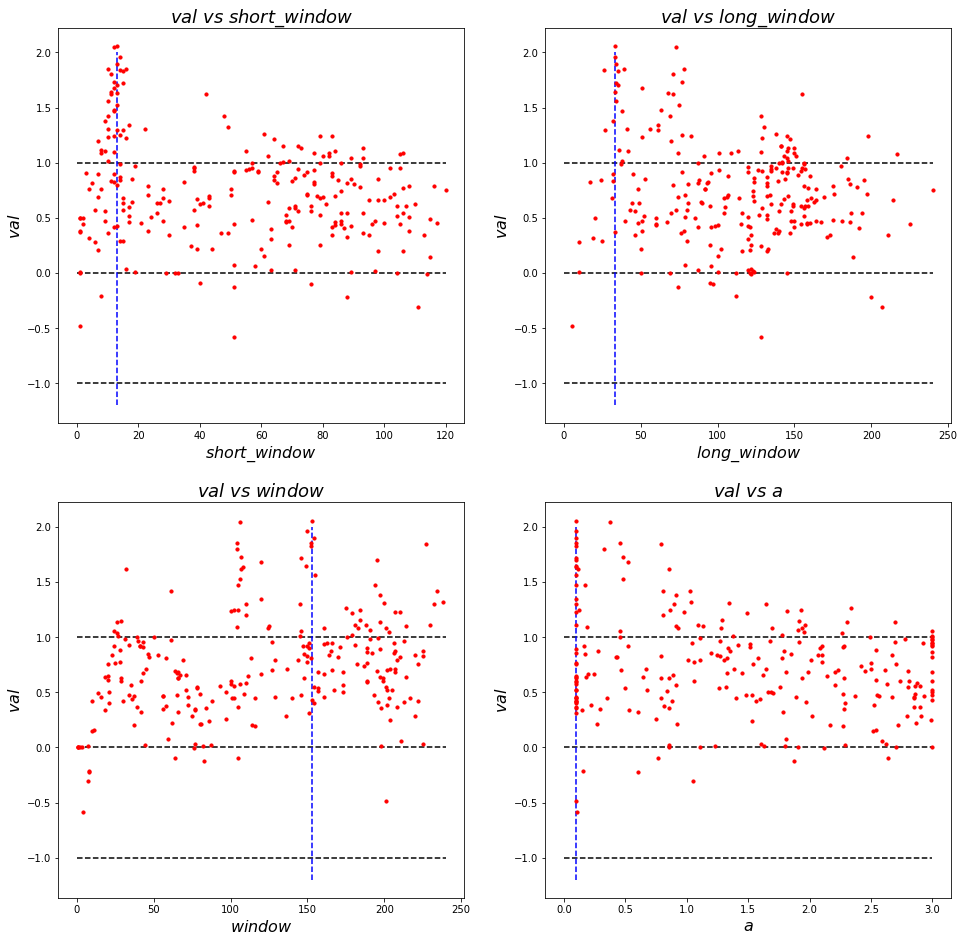

In [13]:
f, ax = plt.subplots(2,2, figsize = (16, 16))
ax[0,0].scatter(BO.X[:,0].flatten(), BO.Y, c="red", s=10, zorder=10)
ax[0,0].set_title('$val$ $vs$ $short\_window$ ', fontsize=18)
ax[0,0].set_xlabel('$short\_window$', fontsize=16)
ax[0,0].set_ylabel('$val$', fontsize=16)
ax[0,0].hlines(0, 0, 120, color='black',linestyle="--")
ax[0,0].hlines(-1, 0, 120, color='black',linestyle="--")
ax[0,0].hlines(1, 0, 120, color='black',linestyle="--")
ax[0,0].vlines(BO.res['max']['max_params']['short_window'], -1.2, 2, color='blue',linestyle="--")

ax[0,1].scatter(BO.X[:,1].flatten() + BO.X[:,0].flatten(), BO.Y, c="red", s=10, zorder=10)
ax[0,1].set_title('$val$ $vs$ $long\_window$ ', fontsize=18)
ax[0,1].set_xlabel('$long\_window$', fontsize=16)
ax[0,1].set_ylabel('$val$', fontsize=16)
ax[0,1].hlines(0, 0, 240,color='black',linestyle="--")
ax[0,1].hlines(-1, 0, 240, color='black',linestyle="--")
ax[0,1].hlines(1, 0, 240,color='black',linestyle="--")
ax[0,1].vlines(BO.res['max']['max_params']['delta_window'] + BO.res['max']['max_params']['short_window'],
               -1.2, 2, color='blue',linestyle="--")

ax[1,0].scatter(BO.X[:,2].flatten(), BO.Y, c="red", s=10, zorder=10)
ax[1,0].set_title('$val$ $vs$ $window$ ', fontsize=18)
ax[1,0].set_xlabel('$window$', fontsize=16)
ax[1,0].set_ylabel('$val$', fontsize=16)
ax[1,0].hlines(0, 0, 240,color='black',linestyle="--")
ax[1,0].hlines(-1, 0, 240, color='black',linestyle="--")
ax[1,0].hlines(1, 0, 240,color='black',linestyle="--")
ax[1,0].vlines(BO.res['max']['max_params']['window'], -1.2, 2, color='blue',linestyle="--")

ax[1,1].scatter(BO.X[:,3].flatten(), BO.Y, c="red", s=10, zorder=10)
ax[1,1].set_title('$val$ $vs$ $a$ ', fontsize=18)
ax[1,1].set_xlabel('$a$', fontsize=16)
ax[1,1].set_ylabel('$val$', fontsize=16)
ax[1,1].hlines(0, 0, 3,color='black',linestyle="--")
ax[1,1].hlines(-1, 0, 3, color='black',linestyle="--")
ax[1,1].hlines(1, 0, 3,color='black',linestyle="--")
ax[1,1].vlines(BO.res['max']['max_params']['a'], -1.2, 2, color='blue',linestyle="--")

## Acquisition Function "Probability of Improvement"

* Prefer exploitation (xi=1e-4)
* Prefer exploration (xi=0.1)